# Исследование надежности заемщиков.

Выполним анализ данных для кредитного отдела банка. Нужно ответить на ряд вопросов: влияет ли семейное положение, уровень дохода, количество детей в семье и цель кредита на  факт погашения кредита в срок. 
Для анализа предоставлена статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Шаг-1.-Обзор-данных" data-toc-modified-id="Шаг-1.-Обзор-данных-0.1">Шаг 1. Обзор данных</a></span></li><li><span><a href="#Шаг-2.1-Заполнение-пропусков" data-toc-modified-id="Шаг-2.1-Заполнение-пропусков-0.2">Шаг 2.1 Заполнение пропусков</a></span></li><li><span><a href="#Шаг-2.2-Проверка-данных-на-аномалии-и-исправления." data-toc-modified-id="Шаг-2.2-Проверка-данных-на-аномалии-и-исправления.-0.3">Шаг 2.2 Проверка данных на аномалии и исправления.</a></span></li><li><span><a href="#Шаг-2.3.-Изменение-типов-данных." data-toc-modified-id="Шаг-2.3.-Изменение-типов-данных.-0.4">Шаг 2.3. Изменение типов данных.</a></span></li><li><span><a href="#Шаг-2.4.-Удаление-дубликатов." data-toc-modified-id="Шаг-2.4.-Удаление-дубликатов.-0.5">Шаг 2.4. Удаление дубликатов.</a></span></li><li><span><a href="#Шаг-2.5.-Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма." data-toc-modified-id="Шаг-2.5.-Формирование-дополнительных-датафреймов-словарей,-декомпозиция-исходного-датафрейма.-0.6">Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.</a></span></li><li><span><a href="#Шаг-2.6.-Категоризация-дохода." data-toc-modified-id="Шаг-2.6.-Категоризация-дохода.-0.7">Шаг 2.6. Категоризация дохода.</a></span></li><li><span><a href="#Шаг-2.7.-Категоризация-целей-кредита." data-toc-modified-id="Шаг-2.7.-Категоризация-целей-кредита.-0.8">Шаг 2.7. Категоризация целей кредита.</a></span></li></ul></li><li><span><a href="#Зависимость-между-количеством-детей-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-количеством-детей-и-возвратом-кредита-в-срок-1">Зависимость между количеством детей и возвратом кредита в срок</a></span></li><li><span><a href="#Зависимость-между-семейным-положением-и-возвратом-кредита-в-долг" data-toc-modified-id="Зависимость-между-семейным-положением-и-возвратом-кредита-в-долг-2">Зависимость между семейным положением и возвратом кредита в долг</a></span></li><li><span><a href="#Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок" data-toc-modified-id="Зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок-3">Зависимость между уровнем дохода и возвратом кредита в срок</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок-4">Как разные цели кредита влияют на его возврат в срок</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5">Общий вывод:</a></span></li></ul></div>

### Шаг 1. Обзор данных

Импортируем библиотеку Pandas и выводим информацию о файле:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Выведем первые 20 строк таблицы:

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Используем функцию isna() для подсчета пропусков:

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Судя по полученным данным, следующие данные представлены неполностью: days_employed, total_income. Возможно, некоторые кредиты выдавали без справок о доходах, поэтому эта информация частично отсутствует. Также можно объяснить пропуски технической ошибкой, отсутствием дохода или нежеланием клиентов указывать доходы. 

Подставим вместо пропущенных значений total_income медианный доход.


### Шаг 2.1 Заполнение пропусков

Рассчитаем медиану дохода:

In [5]:
income_med = data['total_income'].median()
print (income_med)


145017.93753253992


Медианный доход равен 145017.93753253992 рублям.
Подставим его вместо отсутствующих значений в столбце 'total_income' с помощью функции fillna():

In [6]:
data['total_income'] = data['total_income'].fillna(145017.93753253992)

C помощью функции isna() проверим, остались ли пропуски в столбце 'total_income':

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Как мы видим, в столбце total_income теперь нет пустых значений.

### Шаг 2.2 Проверка данных на аномалии и исправления.

Проверим уникальные значения во всех столбцах:

In [8]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

C помощью функции unique() проверим уникальные значения в каждом столбце:

In [9]:
index = ['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose']
    
for column in index:

    print(data[column].unique())
        

[ 1  0  3  2 -1  4 20  5]
[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
[0 1 2 3 4]
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
[0 1 2 3 4]
['F' 'M' 'XNA']
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
[0 1]
[253875.6394526  112080.01410244 145885.95229686 ...  89672.56115303
 244093.05050043  82047.41889948]
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на провед

Можно увидеть, что некоторые данные неполные или ошибочные:
- в столбце 'children' присутствует значение -1
- в столбце 'dob_years' присутcтвует значение 0
- в столбце 'education' запись строчными и заглавными буквами
- в столбце 'gender' присуствует значение XNA
- в столбце 'purpose' присутствуют неявные дубликаты




В столбце 'days_employed' через функцию head() видны отрицательные значения. Видимо, отсчет дней шел от текущего дня к прошлому (дате найма).
Также некоторые значения необычно большие, ошибочные. Возможно, это техническая ошибка или ошибка при вводе данных.
С помощью функции abs() приведем отрицательные значения к положительным. C помощью функции to_numeric приведем все ошибочные значения к NaN. С помощью функции fillna.median() заменим значения NaN на медианные по этому столбцу:



In [10]:
data['days_employed'] = data['days_employed'].abs()
```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))


Проверим, какое медиaнное значение получилось в столбце 'days_employed': 1993.5 дня. 

In [11]:
print (data['days_employed'].median())

1993.522017019936


Проверим, что в таблице не осталось пропусков:

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Изучим аномалии в столбце 'children'. В данных присутствуют следующие значения: 1,0,3,2,-1,4,20,5.
Очевидно, что следующие значения ошибочны: -1, 20. 
Возможно, это ошибка ввода: вместо -1 предполагалось ввести 1, а вместо 20 - 2.
Проверим, сколько таких ошибочных значений в датасете и насколько они значимы:


In [13]:
print (data.groupby('children')['children'].count())

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


Ошибочных значений 47+76 = 123 на 21525, то есть 0.57 процента от общих данных. Это статистически незначимый процент.  
Используем функцию loc для исправления данныx:

In [14]:
data.loc[data['children'] == -1, 'children'] = 1
data.loc[data['children'] == 20, 'children'] = 2
 

Теперь датасет исправлен:

In [15]:
print (data.groupby('children')['children'].count())

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


### Шаг 2.3. Изменение типов данных.

C помощью метода astype() вещественный тип данных в столбцах total_income и days_employed (float) заменили на целочисленный (int). Количество дней должно быть целым.

In [16]:
data['days_employed'] = data['days_employed'].astype('int')
data['total_income'] = data['total_income'].astype('int')


Выведем первые 5 строк таблицы. Как видно, данные в столбце 'days_employed' изменились на положительные целые числа, без пропусков:


In [17]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.4. Удаление дубликатов.

С помощью функции duplicated().sum() найдем количество явных дубликатов:

In [18]:
data.duplicated().sum()

54

Появление 54 дубликатов может быть связано с технической ошибкой или с ошибкой ввода (повторный ввод). Удалим из таблицы дубликаты и обновим индекс:

In [19]:
data = data.drop_duplicates().reset_index(drop=True)

Проверим, удалились ли дубликаты. Если значение равно 0, то дубликаты удалились:

In [20]:
data.duplicated().sum()

0

Также приведем все значения в столбце 'education' к нижнему регистру:

In [21]:
data['education'] = data['education'].str.lower()
data['education'].unique()





array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

В результате таких преобразований в столбце 'education' осталось 5 категорий.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два новых датафрейма, в которых:
- каждому уникальному значению из education соответствует уникальное значение education_id; 
- каждому уникальному значению из family_status соответствует уникальное значение family_status_id.


In [22]:
data_education = data[['education', 'education_id']].copy()
data_family = data[['family_status', 'family_status_id']].copy()


Проверим, создались ли нужные датафреймы:

In [23]:
data_education.head(5)

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1


In [24]:

data_family.head(5)

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1


Удалим из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id. Проверим c помощью функции columns, что оба столбца удалились:

In [25]:
data = data.drop(['education', 'family_status'], 1)
data.columns







Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt', 'total_income',
       'purpose'],
      dtype='object')

### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

Для этого создадим функцию income_category, которая распределяет доходы по категориям, и применим эту функцию к созданному столбцу.

In [26]:
def income_category (row):

    if row['total_income'] >= 0 and row['total_income'] < 30000:
        return 'E'
    if row['total_income'] >= 30001 and row['total_income'] < 50000:
        return 'D'
    if row['total_income'] >= 50001 and row['total_income'] < 200000:
        return 'C'
    if row['total_income'] >= 200001 and row['total_income'] < 1000000:
        return 'B'
    if row['total_income'] >= 1000000:
        return 'A'
   
data['total_income_category'] = data.apply (lambda row: income_category(row), axis=1)



Выведем на экран таблицу, чтобы проверить, правильно ли определяются категории в новом столбце:

In [27]:
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


### Шаг 2.7. Категоризация целей кредита.

Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

Для этого создадим сеты возможных ответов, которые относятся к той или иной категории. Если цель кредита не входит ни в одну из категорий или сформулирована так, что функция не распознает ее, кредит будет отнесен к категории 'другое'. Чем больше вариантов ответа перечислено в сете, тем точнее будет работать функция.

In [28]:
purpose = ['покупка жилья', 'покупка жилой недвижимости',  'операции с недвижимостью', 'недвижимость', 
             'строительство жилой недвижимости', 'жилье',  'покупка коммерческой недвижимости' 
 'строительство собственной недвижимости', 'строительство недвижимости',  'ремонт жилью', 'покупка жилья для сдачи' ,
             'операции с коммерческой недвижимостью', 'операции с жильем', 'покупка жилья для семьи', 
             'операции со своей недвижимостью', 'покупка недвижимости', 'покупка своего жилья', 
             'строительство собственной недвижимости', 'покупка коммерческой недвижимости', 'приобретение автомобиля', 
           'на покупку автомобиля',  'на покупку подержанного автомобиля', 
 'на покупку своего автомобиля', 'автомобили', 'автомобиль', 'свой автомобиль' 'сделка с автомобилем',  
            'сделка с подержанным автомобилем', 'сделка с автомобилем', 'свой автомобиль', 'дополнительное образование',  
           'высшее образование', 'получение высшего образования','получение дополнительного образования', 'образование', 
           'заняться образованием', 'получение образования', 'профильное образование', 'заняться высшим образованием', 
           'сыграть свадьбу',  'на проведение свадьбы',  'свадьба' ]
 

def category(purpose):
    
    try:
        if  'авто' in purpose:
            return 'операции с автомобилем'
        elif 'недвиж' in purpose or 'жиль' in purpose:
            return 'операции с недвижимостью'
        elif 'свадьб' in purpose:
            return 'проведение свадьбы'
        elif 'образо' in purpose:
            return 'получение образования'
        else:
            return 'другое'
               
    except:
        return 'Ошибка'
        
        
   
data['purpose_category'] = data['purpose'].apply(category)

In [29]:
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


Как мы видим, в таблице появился новый столбец purpose_category, в котором все кредиты распредились по четырем категориям.

# Ответы на вопросы.

## Зависимость между количеством детей и возвратом кредита в срок

Чтобы ответить на вопрос, есть ли зависимость между количеством детей и возвратом кредита в срок, нужно вычислить средний риск по задолженности у заемщиков из шести категорий. В каждую из категорий войдут заемщики с одинаковым количеством детей - от 0 до 5.
Затем на основе полученных данных построим график соотношения уровня задолженности и количества детей у заемщика. Если с увеличением количества детей функция возрастает, то зависимость существует.

Используем функцию agg() для фильтрации по нужным значениям и для нахождения количества займов в каждой из категорий и суммы  задолженностей.


In [30]:
data_debt = data.groupby('children')['debt'].agg(['sum', 'count'])
print (data_debt)


      

           sum  count
children             
0         1063  14107
1          445   4856
2          202   2128
3           27    330
4            4     41
5            0      9


Рассчитаем отношение - сумма задолженностей к количеству займов в каждой категории, чтобы вычислить средний риск по задолженности на клиента в каждой категории:

In [31]:
print  (data_debt['sum']/data_debt['count'])

children
0    0.075353
1    0.091639
2    0.094925
3    0.081818
4    0.097561
5    0.000000
dtype: float64


Проверим значения с помощью pivot table:

In [32]:
pd.pivot_table(data,
               index=[ 'children'],
               values=['debt'],
               aggfunc='mean')

,debt
children,
0,0.075353
1,0.091639
2,0.094925
3,0.081818
4,0.097561
5,0.000000


Построим график: 
- ось х - количество детей в семье
- ось y - средний уровень задолженности на клиента в данной категории



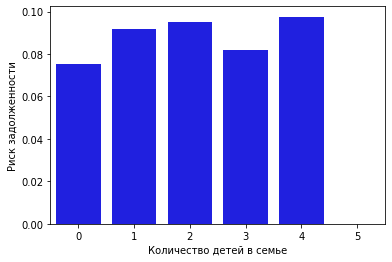

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
debt = pd.DataFrame({'kids': [0,1,2,3,4,5], 'debt': [0.075353, 0.091639, 0.094925, 0.081818, 0.097561, 0.000000]})

ax = sns.barplot(x = 'kids', y = 'debt',
              data = debt,
              color = 'blue')
ax.set(xlabel='Количество детей в семье', ylabel='Риск задолженности')
plt.show()




На графике видно, что уровень задолженности связан с количеством детей у заемщика. Хотя клиенты с тремя детьми имеют меньшую задолженность, чем клиенты с двумя детьми, в целом тренд графика возрастающий. Группа клиентов с 5 детьми имеет нулевую задолженность, но таких клиентов в данных всего 9, поэтому возможно, что данные в этой категории нерепрезентативны. В целом, наименьший риск представляют заемщики без детей.

## Зависимость между семейным положением и возвратом кредита в долг

Аналогичным образом найдем ответ на следующий вопрос: есть ли зависимость между семейным положением и возвратом кредита в срок?
Сгруппируем данные по категориям 'family_status_id' (которым соответствуют следующие статусы: 'женат / замужем', 'гражданский брак','вдовец / вдова', 'в разводе', 'Не женат / не замужем'). Затем разделим сумму задолженностей на количество займов и вычислим риск по задолженности в каждой из категорий. Для наглядности построим график.

In [34]:
data_debt_family_id = data.groupby('family_status_id')['debt'].agg(['sum', 'count'])
print (data_debt_family_id)
print ('= '* 20)
print ('')
print  (data_debt_family_id['sum']/data_debt_family_id['count'])

                  sum  count
family_status_id            
0                 931  12344
1                 388   4163
2                  63    959
3                  85   1195
4                 274   2810
= = = = = = = = = = = = = = = = = = = = 

family_status_id
0    0.075421
1    0.093202
2    0.065693
3    0.071130
4    0.097509
dtype: float64


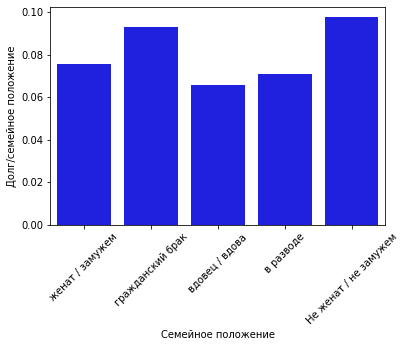

In [35]:
debt = pd.DataFrame({'family_status_id': ['женат / замужем', 'гражданский брак','вдовец / вдова', 
                                          'в разводе', 'Не женат / не замужем'], 
                     'debt': [0.075421, 0.093202, 0.065693, 0.071130, 0.097509]})

ax = sns.barplot(x = 'family_status_id', y = 'debt',
              data = debt,
              color = 'blue')
plt.xticks(rotation=45)
ax.set(xlabel='Семейное положение', ylabel='Долг/семейное положение')
plt.show()

На графике видно, что самый большой риск невозврата наблюдается в группе 'Не женат / не замужем', что также может коррелировать с молодым возрастом заемщиков. Одинокие клиенты из групп 'вдовец / вдова', 'в разводе' несут меньшие риски, чем клиенты из групп 'женат / замужем' и 'гражданский брак'. В целом, не наблюдается прямой зависимости между семейным составом и долговой нагрузкой.

## Зависимость между уровнем дохода и возвратом кредита в срок 

Ответим на следующий вопрос: есть ли зависимость между уровнем дохода и возвратом кредита в срок?
Сгруппируем данные по категориям 'total_income_category':
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

Вычислим количество клиентов в каждой группе и рассчитаем среднюю задолженность на клиента в каждой из категорий. Посмотрим на графике, коррелирует ли уровень задолженности с падением доходов.

In [36]:
data_debt_income = data.groupby('total_income_category')['debt'].agg(['sum', 'count'])
print (data_debt_income)
print ('= '* 20)
print ('')
print  (data_debt_income['sum']/data_debt_income['count'])

                        sum  count
total_income_category             
A                         2     25
B                       356   5041
C                      1360  16033
D                        21    350
E                         2     22
= = = = = = = = = = = = = = = = = = = = 

total_income_category
A    0.080000
B    0.070621
C    0.084825
D    0.060000
E    0.090909
dtype: float64


Создадим график:

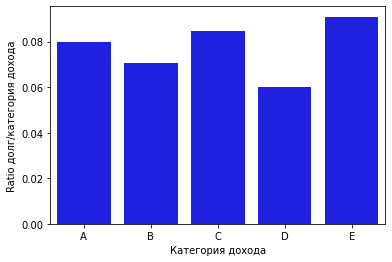

In [37]:
debt = pd.DataFrame({'total_income_category': ['A', 'B', 'C', 'D', 'E'], 'debt': [ 0.080000, 0.070621, 0.084825, 0.060000, 0.090909]})

ax = sns.barplot(x = 'total_income_category', y = 'debt',
              data = debt,
              color = 'blue')
ax.set(xlabel='Категория дохода', ylabel='Ratio долг/категория дохода')
plt.show()

Уровень задолженности растет с падением доходов. Это особенно ярко выражено в последней группе E, где уровень доходов не превышает 30000 руб. Эта группа представляет собой наибольший риск по невыплате кредитов. В группах с большими доходами задолженность выражена не так ярко, а значит, риск невыплаты кредитов меньше.

Представим результаты с помощью pivot table:

## Как разные цели кредита влияют на его возврат в срок

Чтобы ответить на вопрос, как цели кредита влияют на его возврат в срок, вычислим среднее значение по задолженности на клиента в категориях: 'операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы', 'получение образования'.
В каждой из категорий, разделив сумму задолженностей на количество займов, получим уровень риска по задолженности:

In [38]:
data_debt_purpose = data.groupby('purpose_category')['debt'].agg(['sum', 'count'])
print (data_debt_purpose)
print ('= '* 20)
print ('')
print  (data_debt_purpose['sum']/data_debt_purpose['count'])

                          sum  count
purpose_category                    
операции с автомобилем    403   4308
операции с недвижимостью  782  10814
получение образования     370   4014
проведение свадьбы        186   2335
= = = = = = = = = = = = = = = = = = = = 

purpose_category
операции с автомобилем      0.093547
операции с недвижимостью    0.072314
получение образования       0.092177
проведение свадьбы          0.079657
dtype: float64


Построим график соотношения задолженности и категорий по целям займа:

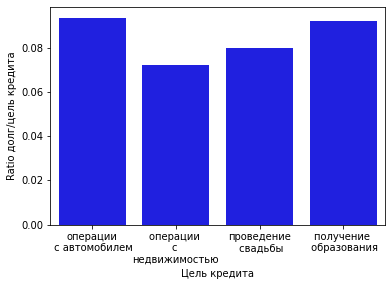

In [39]:
debt = pd.DataFrame({'purpose_category': ['операции\n с автомобилем', 'операции \nс \nнедвижимостью', 'проведение\n свадьбы', 
                                          'получение \n образования'], 
                     'debt': [0.093547, 0.072314, 0.079657, 0.092177]})

ax = sns.barplot(x = 'purpose_category', y = 'debt',
              data = debt,
              color = 'blue')
ax.set(xlabel='Цель кредита', ylabel='Ratio долг/цель кредита')
plt.show()

На графике видно, что чаще всего задолженности образуются по следующим целям кредитов: 'операции с автомобилем', 'получение образования'. Наименее рискованная категория займов - 'операции с недвижимостью'.

## Общий вывод:

Мы провели исследование заемщиков в банке на основе полученных данных. Получив датасет, заменили отсутствующие значения в столбцах days_employed и total_income на медианные, удалили дубликаты. Удалили из таблицы столбцы education и family_status, оставив в исходном датасете только идентификаторы этих данных. 
Cоздали столбец total_income_category с категориями от A до E, распределив заемщиков по категориям доходов. Создали функцию, которая на основании данных из столбца purpose сформировала новый столбец purpose_category, где займы были распределены по четырем категориям согласно цели займа.

В целом, можно определить категории заемщиков с повышенным риском задолженности по кредиту. 
Дополнительные риски создают следующие факторы:
- наличие детей (от 1 ребенка и больше); минимальный риск наблюдается у заемщиков без детей
- семейный статус 'Не женат / не замужем'
- низкий уровень дохода; особенно высокий риск наблюдается в группе с доходами до 30000 рублей
- цели кредита -  'операции с автомобилем', 'получение образования'; по этим категориям риск задолженности по кредиту выше, чем по другим категориям

На основании этих данных можно будет создать кредитный скоринг, который поможет принимать решение о выдаче кредита заемщику.




